# Approach

Approach: K-means clustering will group similar colors together into ‘k’ clusters (say k=64) of different colors (RGB values). Therefore, each cluster centroid is representative of the color vector in the RGB color space of its respective cluster. Now, these ‘k’ cluster centroids will replace all the color vectors in their respective clusters. Thus, we need to only store the label for each pixel that tells the cluster to which this pixel belongs. Additionally, we keep a record of the color vectors of each cluster center. 

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

def read_image():
	img = cv2.imread('/Users/kaushalsingh/Desktop/Projects/Image Compression/Rohit-Sharma-IPL.png') # Replace with the actual path to your image

	# Convert the image from BGR to RGB
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



	# Scaling the image so that the values are in the range of 0 to 1
	img = img / 255.0


	return img

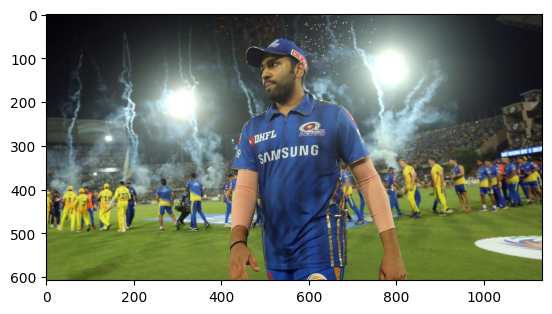

In [150]:
img = mpimg.imread('/Users/kaushalsingh/Desktop/Projects/Image Compression/Rohit-Sharma-IPL.png')
imgplot = plt.imshow(img)
plt.show()
A = img

In [151]:

def initialize_means(img, clusters):
	# reshaping it or flattening it into a 2d matrix
	points = img.reshape((-1, img.shape[2]))
	m, n = points.shape

	# clusters is the number of clusters
	# or the number of colors that we choose.

	# means is the array of assumed means or centroids.
	means = np.zeros((clusters, n))

	# random initialization of means.
	for i in range(clusters):
		rand_indices = np.random.choice(m, size=10, replace=False)
		means[i] = np.mean(points[rand_indices], axis=0)

	return points, means

In [152]:
# Function- To measure the euclidean distance (distance formula)
def distance(x1, y1, x2, y2):
	dist = np.square(x1 - x2) + np.square(y1 - y2)
	dist = np.sqrt(dist)
	return dist

In [153]:
def k_means(points, means, clusters):
	iterations = 10 # the number of iterations
	m, n = points.shape

	# these are the index values that correspond to the cluster to
	# which each pixel belongs to.
	index = np.zeros(m)

	# k-means algorithm.
	while iterations > 0:
		for j in range(m):
			# initialize minimum value to a large value
			min_dist = float('inf')
			temp = None

			for k in range(clusters):
				x1, y1 = points[j, 0], points[j, 1]
				x2, y2 = means[k, 0], means[k, 1]

				if distance(x1, y1, x2, y2) <= min_dist:
					min_dist = distance(x1, y1, x2, y2)
					temp = k
					index[j] = k

		for k in range(clusters):
			cluster_points = points[index == k]
			if len(cluster_points) > 0:
				means[k] = np.mean(cluster_points, axis=0)

		iterations -= 1

	return means, index


In [154]:
def plot_image(Orginal,Compressed):
    fig,ax = plt.subplots(1,2)
    Img1 = ax[0].imshow(Orginal)
    Img2 = ax[1] .imshow(Compressed)
    for i in range(2):
        title = ["Orginal","Compressed"]
        ax[i].set_title(title[i])

In [155]:
def plot_image(Orginal,Compressed):
    fig,ax = plt.subplots(1,2)
    Img1 = ax[0].imshow(Orginal)
    Img2 = ax[1] .imshow(Compressed)
    for i in range(2):
        title = ["Orginal","Compressed"]
        ax[i].set_title(title[i])

In [156]:
def compress_image(means, index, img):
	# recovering the compressed image by assigning each pixel to its corresponding centroid.
	centroid = np.array(means)
	recovered = centroid[index.astype(int), :]

	# getting back the 3d matrix (row, col, rgb(3))
	recovered = recovered.reshape(img.shape)

	# plotting the compressed image.



	# saving the compressed image.
	cv2.imwrite('compressed_' + str(clusters) + '_colors.png',recovered)
	return recovered # Fixed indentation

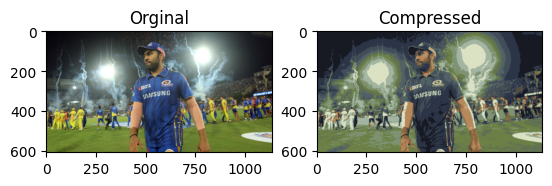

In [157]:
# Driver Code
if __name__ == '__main__':
	img = read_image()

	clusters = 16
	clusters = int(input('Enter the number of colors in the compressed image (default = 16): '))

	points, means = initialize_means(img,clusters)
	means, index = k_means(points, means, clusters)
	compressed = compress_image(means, index, img)

plot_image(img,compressed)
